In [10]:
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))

In [11]:
from environments.base import DummyEnvironment
from environments.contextual import OrderBookEnvironment 
from learners.experts import GFTMax, ConstrainedGFTMax, EstimateDeterministicLipschitzValuations
from utils.regret import compute_scaling_laws
from utils.valuations import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
T = 10000000 # Best expert over 100 Million turns is computed in less than a minute
env = DummyEnvironment(T)
print(env.get_best_expert())

((0.0, 0.25), 1249706.0)


In [3]:
T = 100000
env = DummyEnvironment(T)
learner = GFTMax(T, env)
learner.run()

Best expert on multiplicative grid: [0.25 0.25]. GFT: 75000.0


In [12]:
T = 100000
contexts, valuations = construct_sequence_with_lipschitz_valuations(T, 1)
env = OrderBookEnvironment(T, contexts, valuations)
learner = ConstrainedGFTMax(T, env)
learner.run()
print(learner.hedge_profit.get_best_expert())

(array([0.52848101, 0.52848101]), 8835.178882776556)


In [13]:
T = 100000
contexts, valuations = construct_sequence_with_lipschitz_valuations(T, 10)
env = OrderBookEnvironment(T, contexts, valuations)
learner = ConstrainedGFTMax(T, env)
learner.run()
print(learner.hedge_profit.get_best_expert())

(array([0.47468354, 0.47468354]), 9582.670809600855)


In [14]:
T = 100000
contexts, valuations = construct_sequence_with_lipschitz_valuations(T, 100)
env = OrderBookEnvironment(T, contexts, valuations)
learner = ConstrainedGFTMax(T, env)
learner.run()
print(learner.hedge_profit.get_best_expert())

(array([0.50316456, 0.50316456]), 8378.397958655349)


Always guessing in the middle. Makes sense since the function is sinusoidal and the center is almost always included, hence the low regret. 

In [12]:
T = 10000
L = 1000
contexts, valuations = construct_sequence_with_lipschitz_valuations(T, L)
env = OrderBookEnvironment(T, contexts, valuations)
learner = EstimateDeterministicLipschitzValuations(T, env, L)
learner.run()
print(learner.gft)
print(env.get_policy_gft_having_adhoc_valuations())

100%|██████████| 9999/9999 [00:01<00:00, 7712.05it/s] 

1386.8119934914805
1654.4983456945142


In [13]:
T = 10000
L = 100
contexts, valuations = construct_sequence_with_lipschitz_valuations(T, L)
env = OrderBookEnvironment(T, contexts, valuations)
learner = EstimateDeterministicLipschitzValuations(T, env, L)
learner.run()
print(learner.gft)
print(env.get_policy_gft_having_adhoc_valuations())

100%|██████████| 9999/9999 [00:01<00:00, 7405.24it/s] 

1611.5774259673124
1643.9840166329484


In [12]:
T = 100
L = 100
contexts, valuations = construct_sequence_with_lipschitz_valuations(T, L)
env = OrderBookEnvironment(T, contexts, valuations)
learner = EstimateDeterministicLipschitzValuations(T, env, L)
learner.run()
print(learner.gft)
print(env.get_policy_gft_having_adhoc_valuations())

100%|██████████| 99/99 [00:00<00:00, 15084.14it/s]

12.218094988400027
16.550634895060956


In [13]:
T = 1000
L = 100
contexts, valuations = construct_sequence_with_lipschitz_valuations(T, L)
env = OrderBookEnvironment(T, contexts, valuations)
learner = EstimateDeterministicLipschitzValuations(T, env, L)
learner.run()
print(learner.gft)
print(env.get_policy_gft_having_adhoc_valuations())

100%|██████████| 999/999 [00:00<00:00, 19969.26it/s]

145.73663077802138
167.13535562559366


In [14]:
T = 10000
L = 100
contexts, valuations = construct_sequence_with_lipschitz_valuations(T, L)
env = OrderBookEnvironment(T, contexts, valuations)
learner = EstimateDeterministicLipschitzValuations(T, env, L)
learner.run()
print(learner.gft)
print(env.get_policy_gft_having_adhoc_valuations())

100%|██████████| 9999/9999 [00:01<00:00, 6381.15it/s] 

1627.8654239636578
1659.974119608851


In [15]:
T = 100000
L = 100
contexts, valuations = construct_sequence_with_lipschitz_valuations(T, L)
env = OrderBookEnvironment(T, contexts, valuations)
learner = EstimateDeterministicLipschitzValuations(T, env, L)
learner.run()
print(learner.gft)
print(env.get_policy_gft_having_adhoc_valuations())

100%|██████████| 99999/99999 [02:12<00:00, 754.72it/s] 

16687.24662213398
16721.744098935713


In [14]:
T = 10000
L = 10
contexts, valuations = construct_sequence_with_lipschitz_valuations(T, L)
env = OrderBookEnvironment(T, contexts, valuations)
learner = EstimateDeterministicLipschitzValuations(T, env, L)
learner.run()
print(learner.gft)
print(env.get_policy_gft_having_adhoc_valuations())

100%|██████████| 9999/9999 [00:01<00:00, 7402.67it/s] 

1665.1171460050782
1667.5765830394023


In [15]:
T = 10000
L = 1
contexts, valuations = construct_sequence_with_lipschitz_valuations(T, L)
env = OrderBookEnvironment(T, contexts, valuations)
learner = EstimateDeterministicLipschitzValuations(T, env, L)
learner.run()
print(learner.gft)
print(env.get_policy_gft_having_adhoc_valuations())

100%|██████████| 9999/9999 [00:01<00:00, 7587.14it/s] 

1670.8071610302575
1671.6555969135707


In [4]:
time, lipschitz_const, regret = compute_scaling_laws(EstimateDeterministicLipschitzValuations, OrderBookEnvironment, policy_regret=True, adhoc_valuations=True)

100%|██████████| 10/10 [00:13<00:00,  1.32s/it]


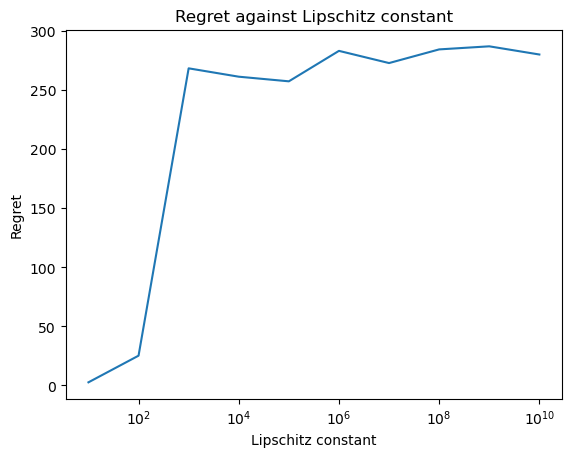

In [6]:
# Plot the regret against the Lipschitz constant (T=10000)
plt.plot(lipschitz_const, regret)
plt.xlabel('Lipschitz constant')
plt.ylabel('Regret')
plt.xscale('log')
plt.title('Regret against Lipschitz constant')
plt.show()

In [3]:
time, lipschitz_const, regret = compute_scaling_laws(EstimateDeterministicLipschitzValuations, OrderBookEnvironment, policy_regret=True, adhoc_valuations=True)

100%|██████████| 1/1 [02:10<00:00, 130.66s/it]


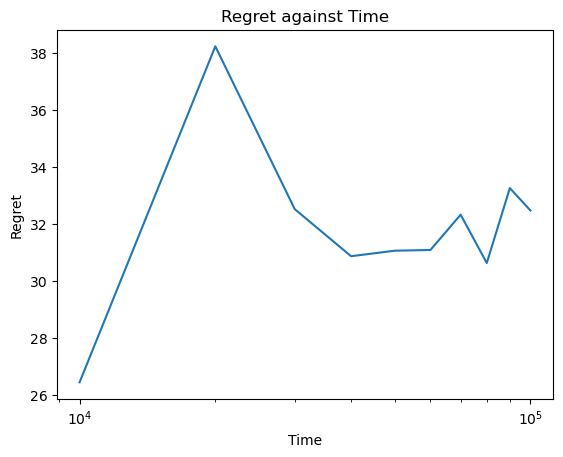

In [4]:
# Plot the regret against the time (L=100)
plt.plot(time, regret)
plt.xlabel('Time')
plt.ylabel('Regret')
plt.xscale('log')
plt.title('Regret against Time')
plt.show()

In [15]:
time, regret = compute_scaling_laws(GFTMax, DummyEnvironment)

100%|██████████| 10/10 [02:58<00:00, 17.80s/it]


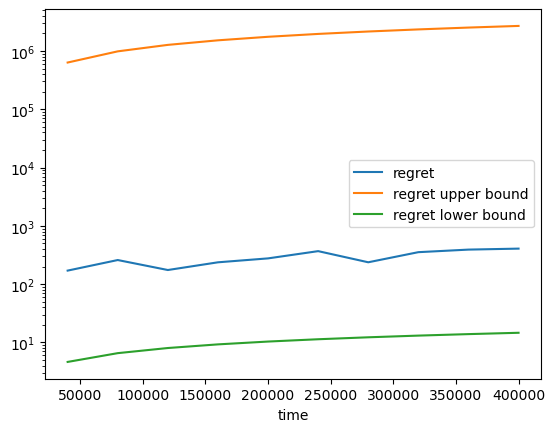

In [16]:
# Plot regret against time
df = pd.DataFrame({'time': time, 'regret': regret})
df.plot(x='time', y='regret')
# add the following equation for the upper bound: 92log^(3/2)(T)sqrt(T)
plt.plot(time, 92*np.log(time)**(3/2)*np.sqrt(time), label='regret upper bound')
# add the following equation for the lower bound: 5/216 sqrt(T)
plt.plot(time, 5/216*np.sqrt(time), label='regret lower bound')
plt.yscale('log')
plt.legend()
plt.show()

In [4]:
time, regret = compute_scaling_laws(ConstrainedGFTMax, OrderBookEnvironment, policy_regret=True)

Best expert on multiplicative grid: [0.04964539 0.04964539]. GFT: 2593.5
Best expert on multiplicative grid: [0.8 0.8]. GFT: 5619.25
Best expert on multiplicative grid: [0.04918033 0.04918033]. GFT: 8599.296875
Best expert on multiplicative grid: [0.04964539 0.04964539]. GFT: 11303.296875
Best expert on multiplicative grid: [0.79746835 0.79746835]. GFT: 14516.9375
Best expert on multiplicative grid: [0.04913295 0.04913295]. GFT: 17187.828125
Best expert on multiplicative grid: [0.04812834 0.04812834]. GFT: 20195.90625
Best expert on multiplicative grid: [0.7975 0.7975]. GFT: 23360.390625
Best expert on multiplicative grid: [0.04716981 0.04716981]. GFT: 26161.484375
Best expert on multiplicative grid: [0.04697987 0.04697987]. GFT: 29473.84375
Best expert on multiplicative grid: [0.04690832 0.04690832]. GFT: 32342.578125
Best expert on multiplicative grid: [0.79754601 0.79754601]. GFT: 35352.484375
Best expert on multiplicative grid: [0.79764244 0.79764244]. GFT: 37940.5
Best expert on m

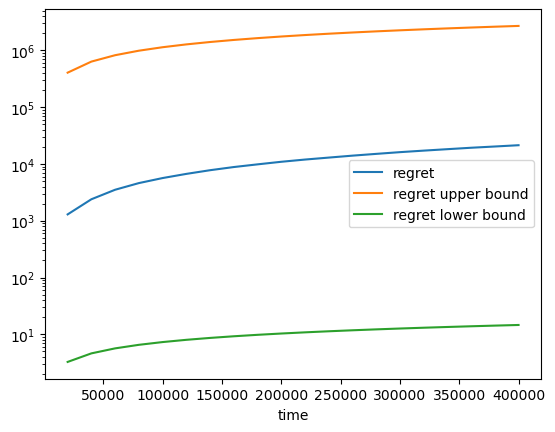

In [5]:
# Plot regret against time
df = pd.DataFrame({'time': time, 'regret': regret})
df.plot(x='time', y='regret')
# add the following equation for the upper bound: 92log^(3/2)(T)sqrt(T)
plt.plot(time, 92*np.log(time)**(3/2)*np.sqrt(time), label='regret upper bound')
# add the following equation for the lower bound: 5/216 sqrt(T)
plt.plot(time, 5/216*np.sqrt(time), label='regret lower bound')
plt.yscale('log')
plt.legend()
plt.show()

In [3]:
time, regret = compute_scaling_laws(ConstrainedGFTMax, OrderBookEnvironment, policy_regret=True, adhoc_valuations=True)

100%|██████████| 10/10 [03:16<00:00, 19.69s/it]


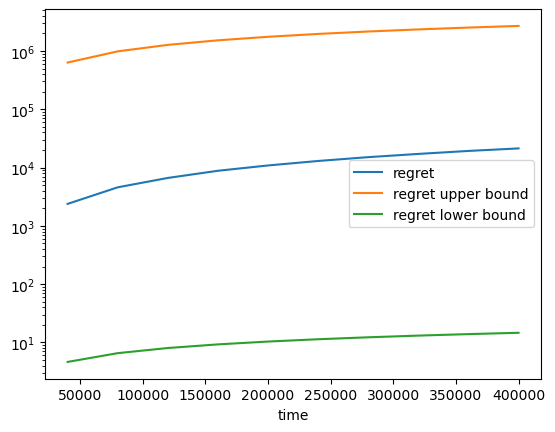

In [4]:
# Plot regret against time
df = pd.DataFrame({'time': time, 'regret': regret})
df.plot(x='time', y='regret')
# add the following equation for the upper bound: 92log^(3/2)(T)sqrt(T)
plt.plot(time, 92*np.log(time)**(3/2)*np.sqrt(time), label='regret upper bound')
# add the following equation for the lower bound: 5/216 sqrt(T)
plt.plot(time, 5/216*np.sqrt(time), label='regret lower bound')
plt.yscale('log')
plt.legend()
plt.show()